In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [55]:
df = pd.read_csv('Friskis1_team_data.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

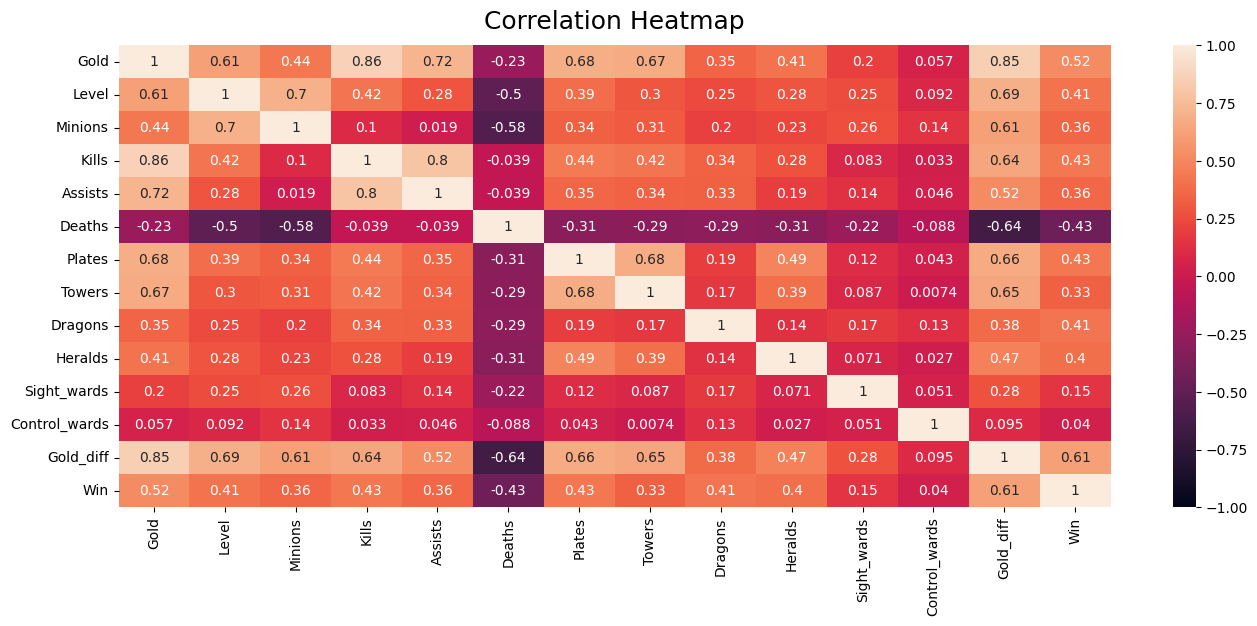

In [56]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

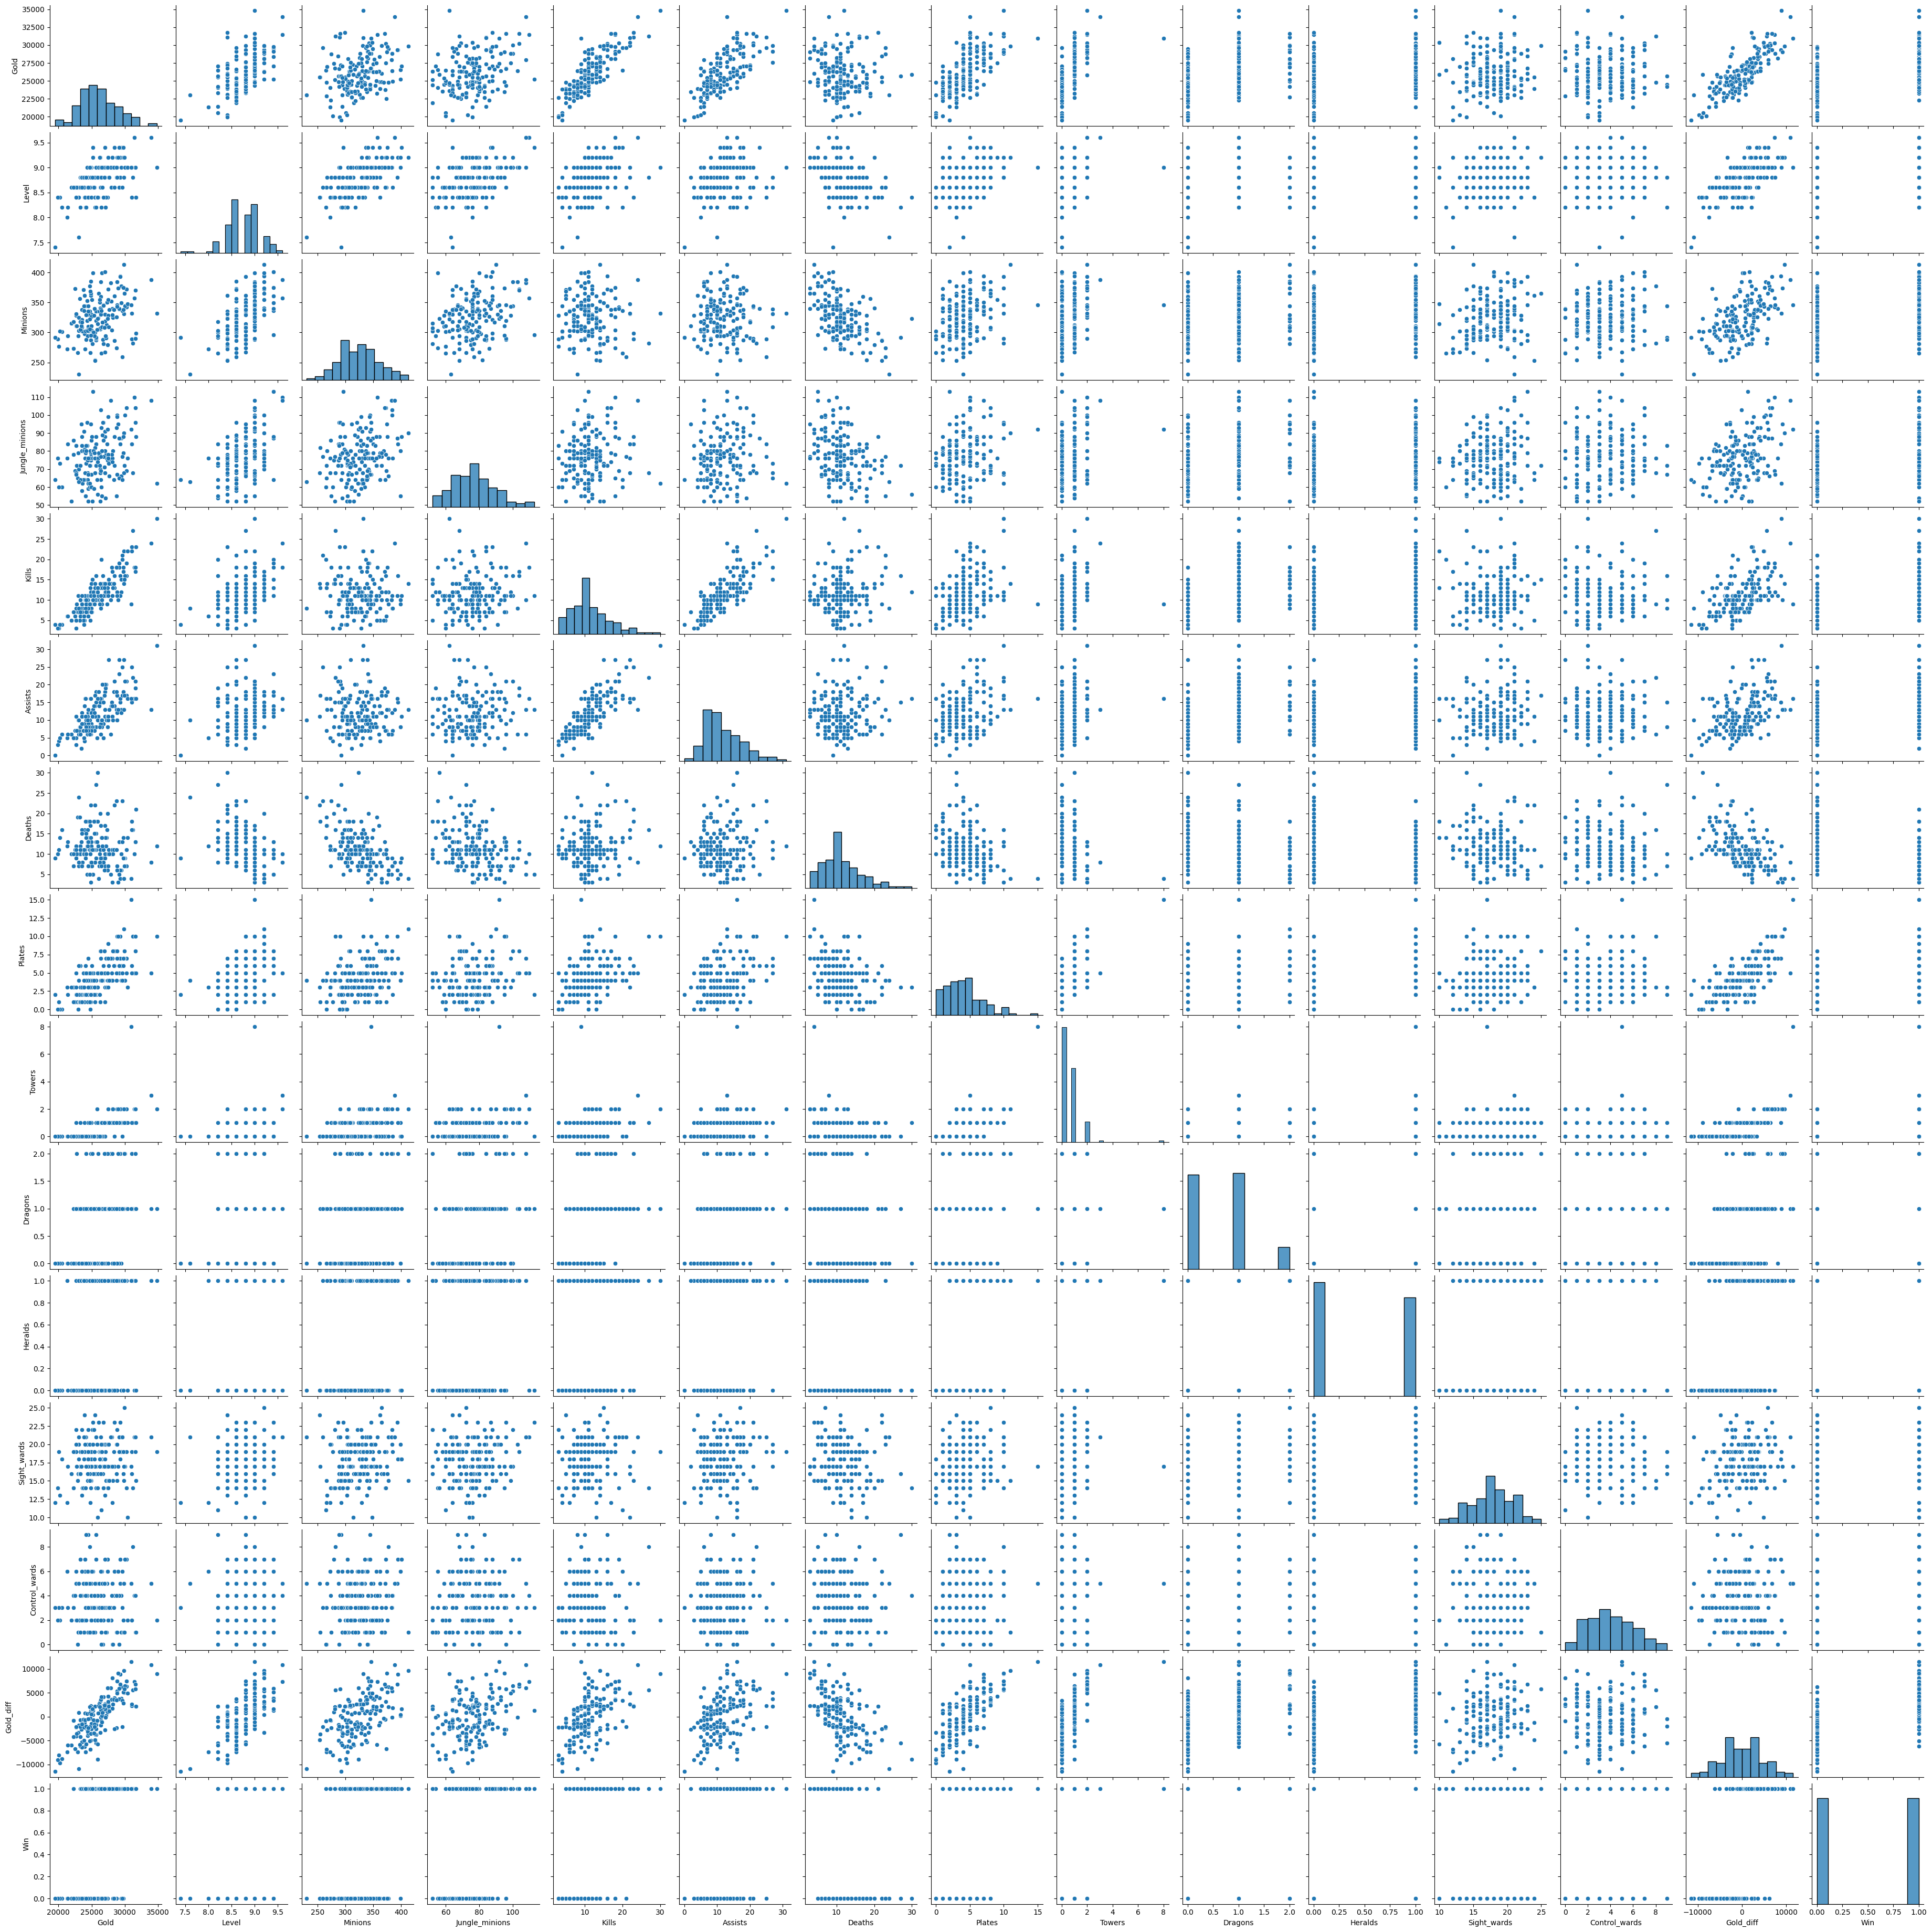

In [6]:
sns.pairplot(df)
plt.show()

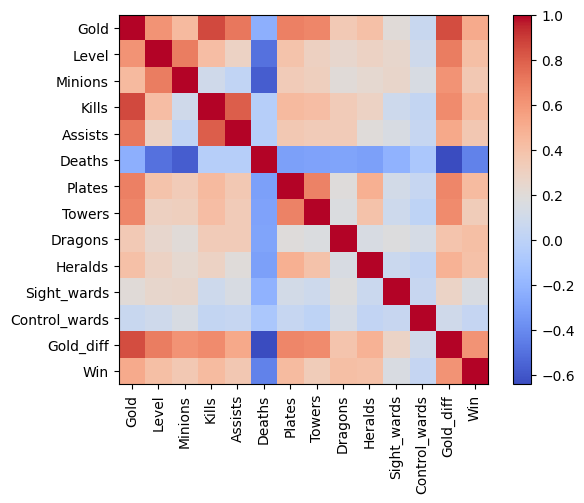

In [57]:
corr_matrix = df.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.show()

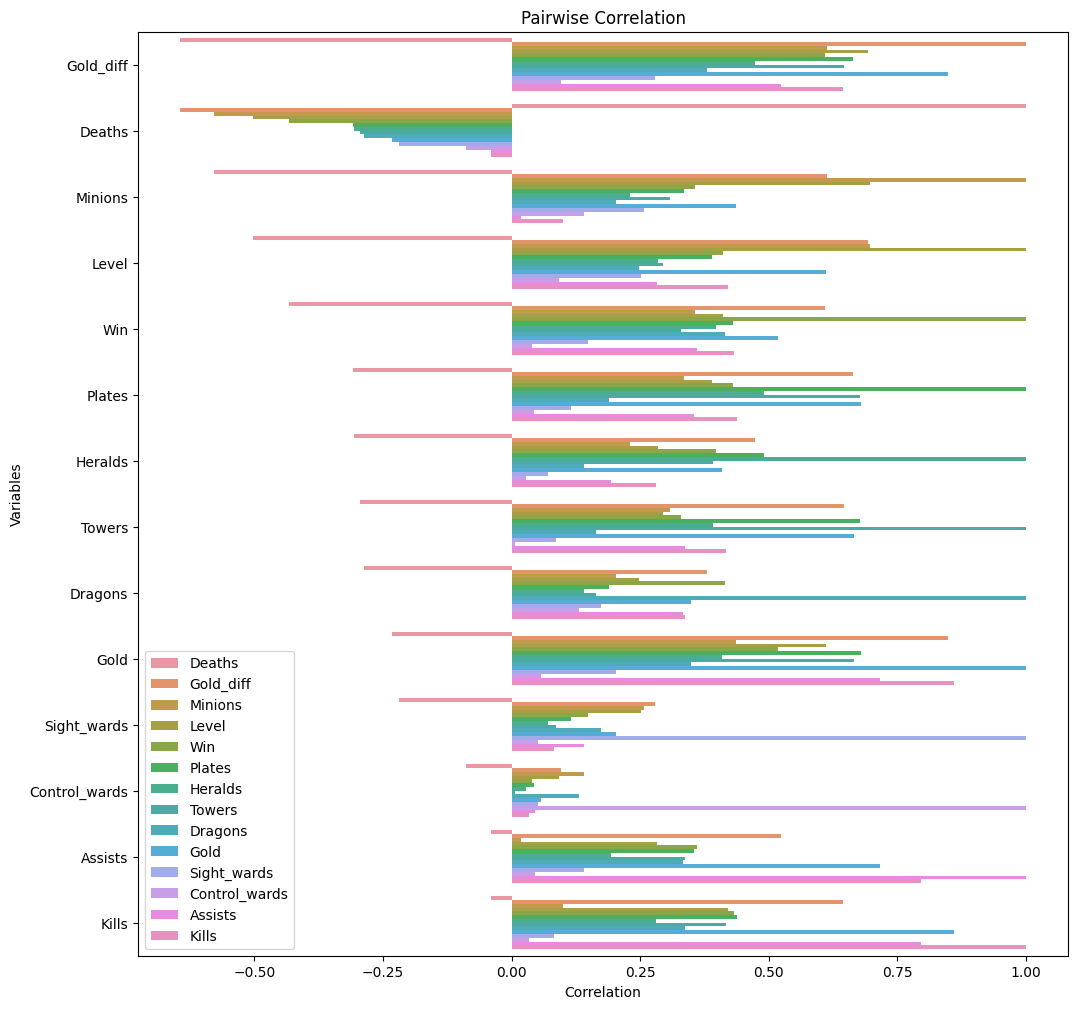

In [58]:
plt.figure(figsize=(12, 12))
sns.barplot(data=df.corr().unstack().sort_values().reset_index(), x=0, y='level_0', hue='level_1', orient='h')
plt.xlabel('Correlation')
plt.ylabel('Variables')
plt.title('Pairwise Correlation')
plt.legend()
plt.show()

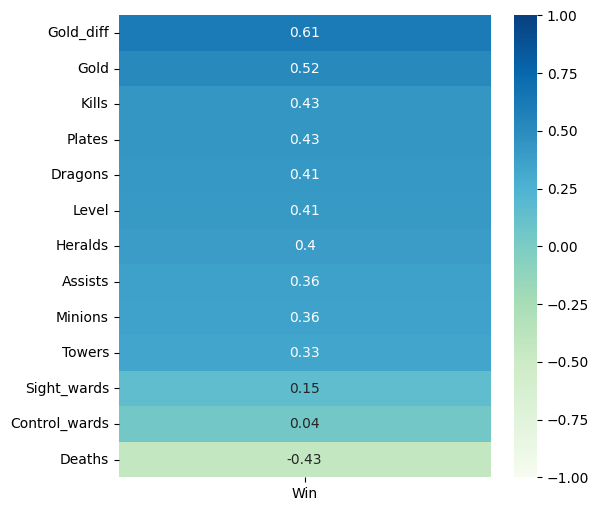

In [59]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [63]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    disp.ax_.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [61]:
#We will first set the complete DataFrames
x_keep_original = ['Gold', 'Level', 'Minions', 'Kills', 'Assists', 'Deaths', 'Towers', 'Dragons', 'Heralds', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333333, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.8142    0.8142    0.8142       113
           1     0.8264    0.8264    0.8264       121

    accuracy                         0.8205       234
   macro avg     0.8203    0.8203    0.8203       234
weighted avg     0.8205    0.8205    0.8205       234

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7692    0.7937    0.7813        63
           1     0.7547    0.7273    0.7407        55

    accuracy                         0.7627       118
   macro avg     0.7620    0.7605    0.7610       118
weighted avg     0.7625    0.7627    0.7624       118

****CONFUSION MATRIX****


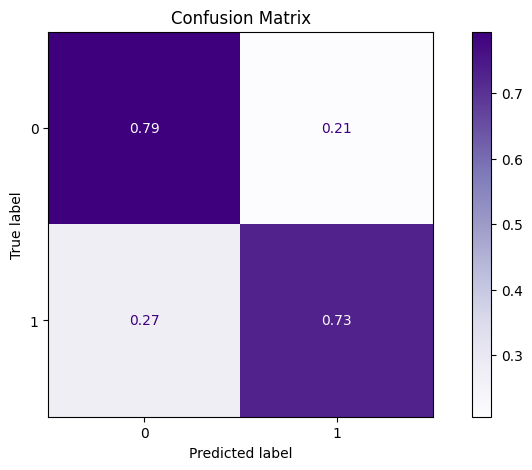

In [64]:
#Logistic regression using the original df
log_select = fit_eval(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       113
           1     1.0000    1.0000    1.0000       121

    accuracy                         1.0000       234
   macro avg     1.0000    1.0000    1.0000       234
weighted avg     1.0000    1.0000    1.0000       234

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7031    0.7143    0.7087        63
           1     0.6667    0.6545    0.6606        55

    accuracy                         0.6864       118
   macro avg     0.6849    0.6844    0.6846       118
weighted avg     0.6861    0.6864    0.6862       118

****CONFUSION MATRIX****


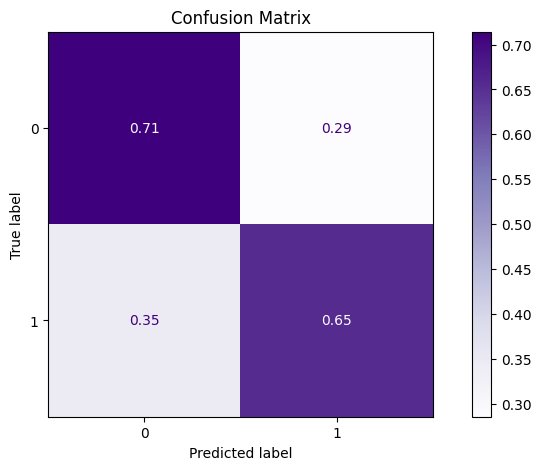

In [65]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       113
           1     1.0000    1.0000    1.0000       121

    accuracy                         1.0000       234
   macro avg     1.0000    1.0000    1.0000       234
weighted avg     1.0000    1.0000    1.0000       234

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7647    0.8254    0.7939        63
           1     0.7800    0.7091    0.7429        55

    accuracy                         0.7712       118
   macro avg     0.7724    0.7672    0.7684       118
weighted avg     0.7718    0.7712    0.7701       118

****CONFUSION MATRIX****


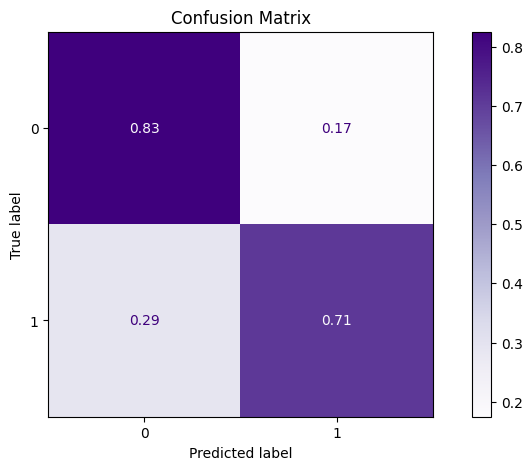

In [66]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.7692    0.7937    0.7813        63
           1     0.7547    0.7273    0.7407        55

    accuracy                         0.7627       118
   macro avg     0.7620    0.7605    0.7610       118
weighted avg     0.7625    0.7627    0.7624       118



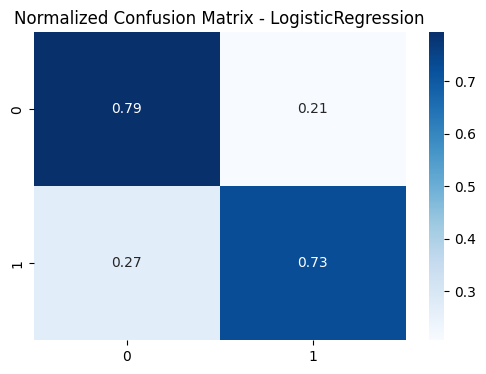

Classification Report:
              precision    recall  f1-score   support

           0     0.6935    0.6825    0.6880        63
           1     0.6429    0.6545    0.6486        55

    accuracy                         0.6695       118
   macro avg     0.6682    0.6685    0.6683       118
weighted avg     0.6699    0.6695    0.6697       118



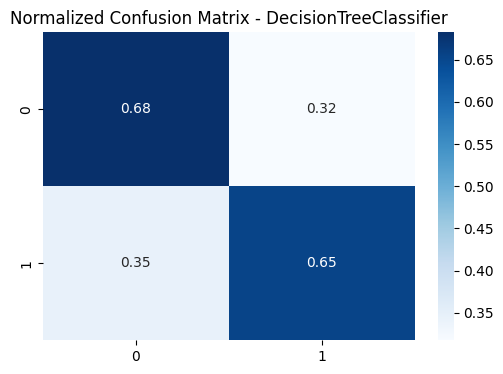

Classification Report:
              precision    recall  f1-score   support

           0    0.73611   0.84127   0.78519        63
           1    0.78261   0.65455   0.71287        55

    accuracy                        0.75424       118
   macro avg    0.75936   0.74791   0.74903       118
weighted avg    0.75778   0.75424   0.75148       118



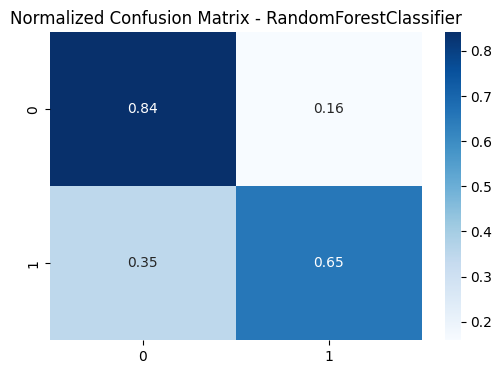

Classification Report:
              precision    recall  f1-score   support

           0    0.76190   0.76190   0.76190        63
           1    0.72727   0.72727   0.72727        55

    accuracy                        0.74576       118
   macro avg    0.74459   0.74459   0.74459       118
weighted avg    0.74576   0.74576   0.74576       118



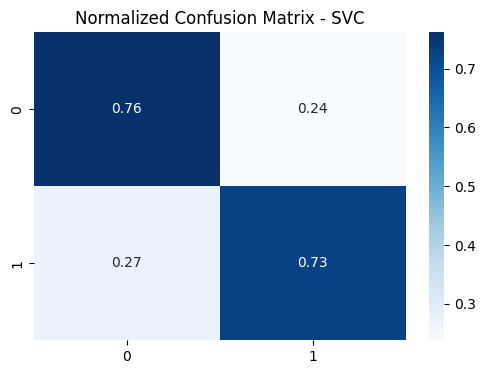

Classification Report:
              precision    recall  f1-score   support

           0    0.76667   0.73016   0.74797        63
           1    0.70690   0.74545   0.72566        55

    accuracy                        0.73729       118
   macro avg    0.73678   0.73781   0.73682       118
weighted avg    0.73881   0.73729   0.73757       118



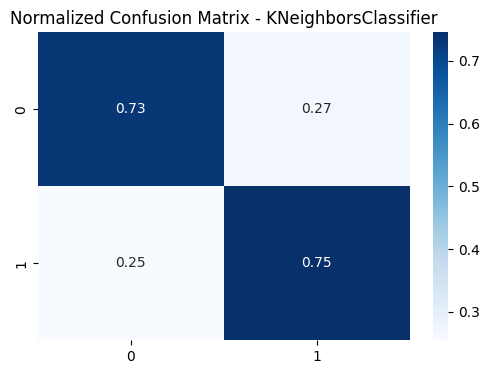

Classification Report:
              precision    recall  f1-score   support

           0    0.76812   0.84127   0.80303        63
           1    0.79592   0.70909   0.75000        55

    accuracy                        0.77966       118
   macro avg    0.78202   0.77518   0.77652       118
weighted avg    0.78107   0.77966   0.77831       118



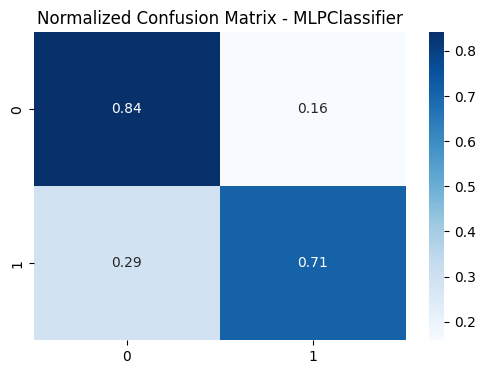

Classification Report:
              precision    recall  f1-score   support

           0    0.74324   0.87302   0.80292        63
           1    0.81818   0.65455   0.72727        55

    accuracy                        0.77119       118
   macro avg    0.78071   0.76378   0.76510       118
weighted avg    0.77817   0.77119   0.76766       118



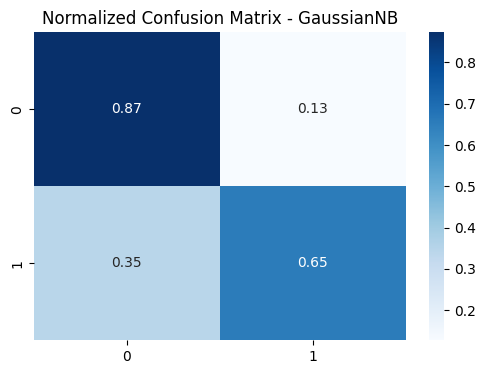

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=5):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Compute classification report
    report = classification_report(y_test, predictions, digits=digits)

    # Print formatted classification report
    print(f"Classification Report:\n{report}")

    # Compute confusion matrix
    confusion_matrix_data = confusion_matrix(y_test, predictions)

    # Normalize confusion matrix
    normalized_confusion_matrix = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    # Plot normalized confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(normalized_confusion_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"Normalized Confusion Matrix - {type(model).__name__}")
    plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, y_train, X_test, y_test, digits=4)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test, digits=4)

# Random Forest
random_forest_model = RandomForestClassifier()
evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# Support Vector Machines (SVM)
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test)

# Neural Networks
neural_network_model = MLPClassifier()
evaluate_model(neural_network_model, X_train, y_train, X_test, y_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)